In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget -q https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/image_data.zip

In [3]:
!unzip image_data.zip

Archive:  image_data.zip
  inflating: image_data/car3.png     
  inflating: image_data/cat.jpeg     
  inflating: image_data/cat2.jpg     
   creating: image_data/data/
   creating: image_data/data/dogs/
  inflating: image_data/data/dogs/dog.1.jpg  
  inflating: image_data/data/dogs/dog.10.jpg  
  inflating: image_data/data/dogs/dog.100.jpg  
  inflating: image_data/data/dogs/dog.101.jpg  
  inflating: image_data/data/dogs/dog.102.jpg  
  inflating: image_data/data/dogs/dog.103.jpg  
  inflating: image_data/data/dogs/dog.104.jpg  
  inflating: image_data/data/dogs/dog.105.jpg  
  inflating: image_data/data/dogs/dog.106.jpg  
  inflating: image_data/data/dogs/dog.107.jpg  
  inflating: image_data/data/dogs/dog.108.jpg  
  inflating: image_data/data/dogs/dog.109.jpg  
  inflating: image_data/data/dogs/dog.11.jpg  
  inflating: image_data/data/dogs/dog.110.jpg  
  inflating: image_data/data/dogs/dog.111.jpg  
  inflating: image_data/data/dogs/dog.112.jpg  
  inflating: image_data/data/dog

In [4]:
img = plt.imread("/content/image_data/cat.jpeg")
img.shape

(350, 525, 3)

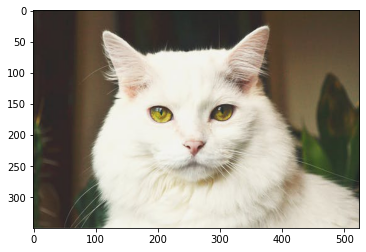

In [5]:
plt.imshow(img)
plt.show()

# Image Classification

In [7]:
import pandas  as pd
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications import resnet50 # added new

## Data Preparation

In [8]:
main_folder = "/content/image_data/data/"
classnames = os.listdir(main_folder)
classnames

['horses', 'Humans', 'dogs']

In [16]:
x = []
y = []
for folder in classnames:
  filelist = os.listdir(main_folder+folder)
  for imgname in filelist:
    img = image.load_img(main_folder+folder+"/"+imgname,target_size=(120,120))
    img = image.img_to_array(img)
    img = resnet50.preprocess_input(img)# added new
    x.append(img)
    y.append(classnames.index(folder))

In [17]:
x = np.array(x)
y = np.array(y)
# onehot encode the labels
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
print(x.shape,y.shape)

(606, 120, 120, 3) (606, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


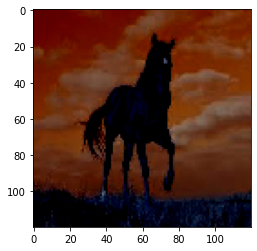

In [18]:
plt.imshow(x[0].astype('int32'))
plt.show()

## Modelling the Convolutional Neural Network

* number of classes = 3
* numer of neurons on output layer = 3
* activation function on output layer = softmax
* loss = categorical_crossentropy

In [14]:
from tensorflow.keras import models,layers

In [ ]:
resmodel = resnet50.ResNet50(weights='imagenet')
resmodel.summary()

In [ ]:
ip_layer = layers.Input(shape=(120,120,3))

resmodel = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=ip_layer)
resmodel.summary()

In [24]:
current_last_layer = resmodel.layers[-1].output
current_last_layer.name

'conv5_block3_out/Relu:0'

In [ ]:
ft = layers.Flatten()(current_last_layer)
op = layers.Dense(3,activation='softmax')(ft)

model = models.Model(inputs=ip_layer,outputs=op)
model.summary()

In [26]:
# freeze all the previous layers
for layer in model.layers[:-1]:
  layer.trainable = False

In [ ]:
model.summary()

In [28]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2,random_state=5)

In [29]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.fit(xtr,ytr,batch_size=32,epochs=10,validation_data=(xts,yts))

Epoch 1/10
16/16 [==============================] - 36s 239ms/step - loss: 1.9837 - accuracy: 0.8202 - val_loss: 0.7246 - val_accuracy: 0.9590
Epoch 2/10
16/16 [==============================] - 2s 105ms/step - loss: 0.1212 - accuracy: 0.9835 - val_loss: 0.3089 - val_accuracy: 0.9836
Epoch 3/10
16/16 [==============================] - 2s 104ms/step - loss: 0.0594 - accuracy: 0.9959 - val_loss: 0.4216 - val_accuracy: 0.9672
Epoch 4/10
16/16 [==============================] - 2s 104ms/step - loss: 1.6290e-05 - accuracy: 1.0000 - val_loss: 0.3016 - val_accuracy: 0.9754
Epoch 5/10
16/16 [==============================] - 2s 104ms/step - loss: 1.6081e-04 - accuracy: 1.0000 - val_loss: 0.2868 - val_accuracy: 0.9672
Epoch 6/10
16/16 [==============================] - 2s 104ms/step - loss: 1.3767e-06 - accuracy: 1.0000 - val_loss: 0.2872 - val_accuracy: 0.9672
Epoch 7/10
16/16 [==============================] - 2s 104ms/step - loss: 1.0506e-06 - accuracy: 1.0000 - val_loss: 0.2874 - val_accura

In [30]:
!wget -q https://idsb.tmgrup.com.tr/2018/05/22/horses-the-wings-of-mankind-1527015927739.jpg

In [31]:
!wget -q https://cdn.britannica.com/96/1296-050-4A65097D/gelding-bay-coat.jpg

In [32]:
!wget -q https://comps.canstockphoto.com/man-stock-photography_csp7345670.jpg

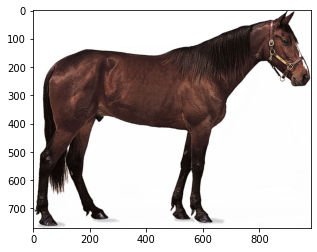

In [39]:
img = plt.imread("gelding-bay-coat.jpg")
plt.imshow(img)
plt.show()

In [40]:
img = image.img_to_array(image.load_img("gelding-bay-coat.jpg",target_size=(120,120)))
img = resnet50.preprocess_input(img)
print(img.shape)
pred = model.predict(img.reshape(1,120,120,3))
print(pred)

(120, 120, 3)
[[1.0000000e+00 1.3526172e-35 1.2625914e-29]]


In [41]:
max_porb = np.argmax(pred)
print(max_porb,classnames[max_porb])

0 horses


In [42]:
model.save("mymodel.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [43]:
import tensorflow as tf

In [44]:
newmodel = tf.keras.models.load_model('mymodel.h5')

In [45]:
newmodel.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 120, 120, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 126, 126, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 60, 60, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 60, 60, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [46]:
current_last_layer = newmodel.layers[-2].output
current_last_layer

<KerasTensor: shape=(None, 32768) dtype=float32 (created by layer 'flatten_1')>